In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
dfx=pd.read_csv(r"C:\Users\Bharath Chandra\Downloads\Train.csv")
print(dfx)

      feature_1  feature_2  feature_3  feature_4  feature_5      target
0      0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2      0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
5     -1.055329  -0.874807   0.580753  -0.773541   1.070888 -122.405263
6     -0.824707   0.499427   1.293281  -0.240671  -0.419136    1.413741
7     -1.936602   0.583708  -0.521135  -0.631724  -1.030729  -13.306543
8      0.647431  -0.265401   0.327080   0.457829  -1.757592  -25.754698
9     -1.133029  -0.839132  -0.547809   0.551768  -0.639173  -57.077754
10    -2.015734   0.102635  -0.136282  -0.021666   0.743511  -41.964694
11     0.995705   0.404433  -0.650904   0.147422  -0.373554   78.080486
12    -2.200223   0.094438  -2.430327  -0.692914  -0.668452  -93

In [87]:
trainx=dfx.loc[:,"feature_1":"feature_5"]
trainy=dfx.loc[:,"target"]
trainx=trainx.values
trainy=trainy.values
print(trainx)
print(trainx.shape)
print(trainy.shape)
X=trainx
Y=trainy

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]
(1600, 5)
(1600,)


In [88]:
def hypothesis(x,theta):
    hx=theta[0]
    for i in range(1,5):
        hx+=theta[i]*x[i]
    return hx
def error(X,Y,theta):
    m=X.shape[0]
    error=0.0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(Y[i]-hx)**2
    return error
def gradient(X,Y,theta):
    grad=np.zeros((6,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=hx-Y[i]
        for j in range(1,5):
            grad[j]+=(hx-Y[i])*X[i][j]
    return grad
def gradientdescent(X,Y,learning_rate=0.001):
    theta=np.array([1.0,2.0,3.0,4.0,5.0,6.0])
    itr=0
    max_itr=100
    error_list=[]
    theta_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))
        for i in range(6):
            theta[i]-=learning_rate*grad[i]
        itr+=1
    return theta,error_list,theta_list

        

In [89]:
final_theta, error_list,theta_list = gradientdescent(X,Y)

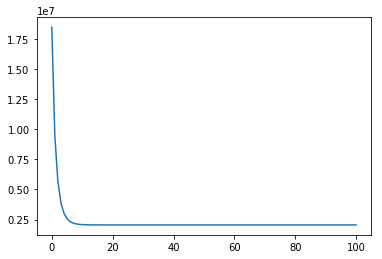

In [90]:
plt.plot(error_list)

In [91]:
test=pd.read_csv(r"C:\Users\Bharath Chandra\Downloads\Test.csv")
#print(test)
#print(test)
test_output=test
test=test.values
print(test.shape)
print(final_theta)

(400, 5)
[ 5.05553676 93.15385172  8.07714418 43.26323635  2.3746108   6.        ]


In [92]:
output=[]
c=final_theta[0]
final_theta=final_theta[1:]
print(final_theta)

[93.15385172  8.07714418 43.26323635  2.3746108   6.        ]


In [93]:
for i in range(test.shape[0]):
    output.append(np.dot(final_theta,test[i])+c)

In [95]:
print(len(output))

400


In [98]:
test_output["target"]=output

In [99]:
print(test_output)

     feature_1  feature_2  feature_3  feature_4  feature_5      target
0     1.015254   2.076209  -0.266435  -2.418088  -0.980503   93.248321
1    -0.375021   0.953185   0.626719   0.704406  -0.355489    4.473528
2    -1.024452   0.962991  -0.407942  -1.861274   0.455201 -101.935402
3    -2.489841   0.544802   0.601219  -0.607021  -1.314286 -205.798764
4    -0.384675  -0.833624   1.358552  -0.547932   0.411925   22.434093
5     0.041547  -0.276119   2.236500  -0.994213   0.334767  103.101504
6    -1.021536  -1.067035   0.439741   1.063519  -1.038031  -83.401205
7    -1.472741   1.221807  -0.608505  -0.986382  -0.585592 -154.448964
8    -0.528322   1.504864   0.915932   0.825660   0.212006   10.854147
9     1.226962   1.183349  -0.264360   0.583738  -0.855756  113.724367
10   -1.178140  -0.328367   0.522524  -1.095108  -0.118244  -88.048869
11   -0.443459   0.245295  -1.018018  -0.658340   1.009180  -73.824132
12    0.117454  -0.385655  -0.318667   0.628106  -0.847442   -4.497849
13    